#### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Exploring and Understanding the Data

In [3]:
# Load the data
dataframe_Amazon_Sales_data = pd.read_csv("Amazon Sales data.csv")

In [4]:
# Display the first few rows of the data
dataframe_Amazon_Sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
# Shape of the dataset

dataframe_Amazon_Sales_data.shape

# Here, the dataframe_Amazon_Sales_data dataset contains 100 rows and 14 columns.

(100, 14)

#### Sales Analysis by Region

In [8]:
# Group by Region and calculate total revenue, total cost, and total profit
region_sales = dataframe_Amazon_Sales_data.groupby('Region')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

region_sales

,Region,Total Revenue,Total Cost,Total Profit
0,Asia,21347091.02,15233245.15,6113845.87
1,Australia and Oceania,14094265.13,9372105.10,4722160.03
2,Central America and the Caribbean,9170385.49,6323477.64,2846907.85
3,Europe,33368932.11,22285993.48,11082938.63
4,Middle East and North Africa,14052706.58,8291514.72,5761191.86
5,North America,5643356.55,4185413.79,1457942.76
6,Sub-Saharan Africa,39672031.43,27488820.03,12183211.40


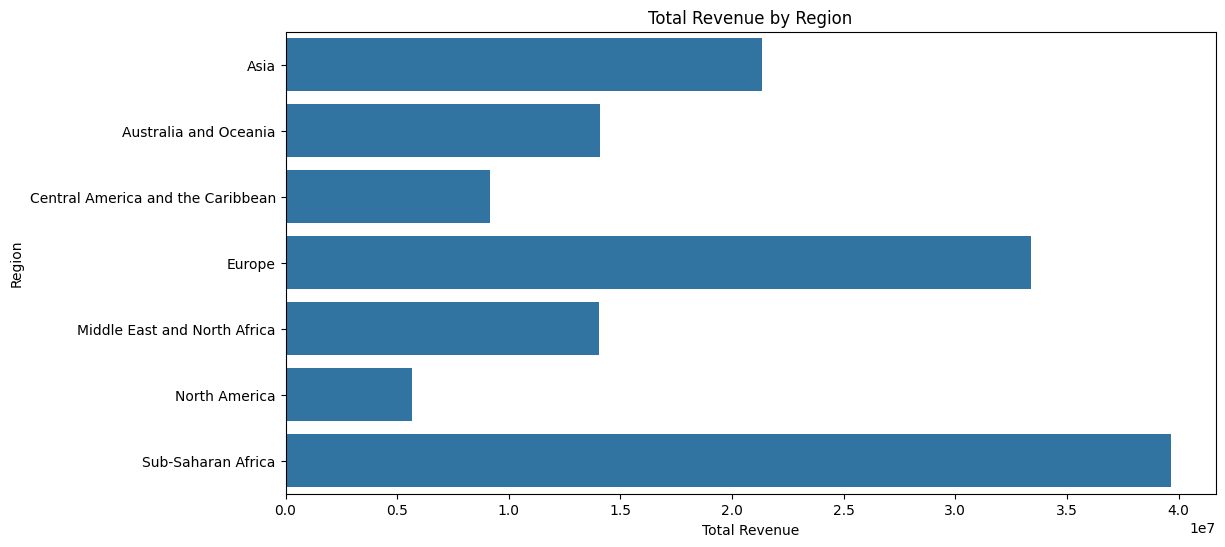

In [9]:
# Group by Region and calculate total revenue, total cost, and total profit
region_sales = dataframe_Amazon_Sales_data.groupby('Region')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

# Plotting Total Revenue by Region
plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales, x='Total Revenue', y='Region')
plt.title('Total Revenue by Region')
plt.xlabel('Total Revenue')
plt.ylabel('Region')
plt.show()


#### Sales Channel Analysis (Online vs Offline)

In [10]:
# Group by Sales Channel and calculate total revenue, total cost, and total profit
sales_channel_analysis = dataframe_Amazon_Sales_data.groupby('Sales Channel')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

# Display the result
(sales_channel_analysis)


,Sales Channel,Total Revenue,Total Cost,Total Profit
0,Offline,79094809.20,54174082.53,24920726.67
1,Online,58253959.11,39006487.38,19247471.73


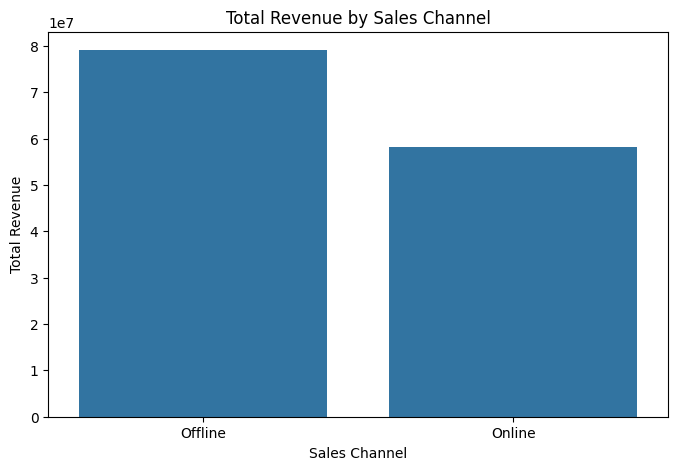

In [11]:
# Group by Sales Channel and calculate total revenue, total cost, and total profit
sales_channel_analysis = dataframe_Amazon_Sales_data.groupby('Sales Channel')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

# Plotting Total Revenue by Sales Channel
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_channel_analysis, x='Sales Channel', y='Total Revenue')
plt.title('Total Revenue by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.show()

#### Top Countries by Total Revenue

In [12]:
# Group by Country and calculate total revenue
country_sales = dataframe_Amazon_Sales_data.groupby('Country')['Total Revenue'].sum().reset_index().sort_values(by='Total Revenue', ascending=False)

# Display the top 10 countries by total revenue
(country_sales.head(10))


,Country,Total Revenue
24,Honduras,6336545.48
46,Myanmar,6161257.90
16,Djibouti,6052890.86
72,Turkmenistan,5822036.20
41,Mexico,5643356.55
71,The Gambia,5449517.95
35,Lithuania,5396577.27
56,Rwanda,5253769.42
4,Azerbaijan,4478800.21
7,Brunei,4368316.68


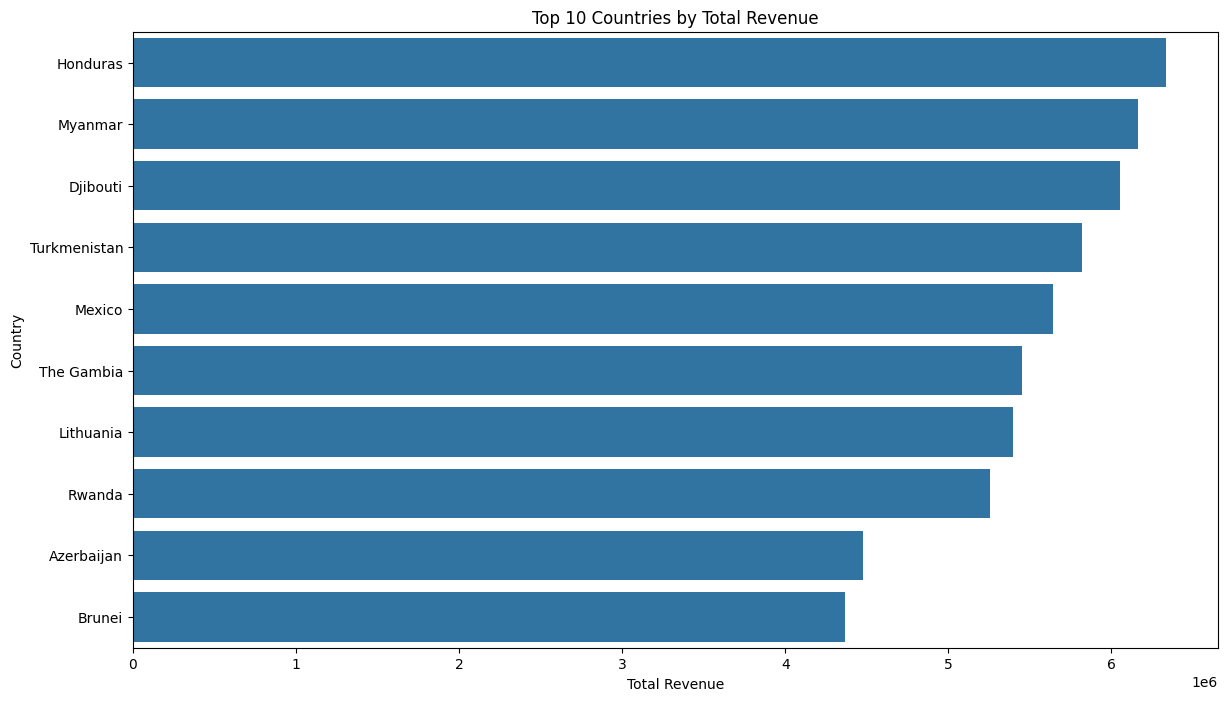

In [12]:
# Group by Country and calculate total revenue
country_sales = dataframe_Amazon_Sales_data.groupby('Country')['Total Revenue'].sum().reset_index().sort_values(by='Total Revenue', ascending=False)

# Plotting Top 10 Countries by Total Revenue
plt.figure(figsize=(14, 8))
sns.barplot(data=country_sales.head(10), x='Total Revenue', y='Country')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()


#### Order Priority Analysis

In [13]:
# Group by Order Priority and calculate total revenue, total cost, and total profit
priority_analysis = dataframe_Amazon_Sales_data.groupby('Order Priority')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

# Display the result
(priority_analysis)


,Order Priority,Total Revenue,Total Cost,Total Profit
0,C,18855063.05,12106734.59,6748328.46
1,H,48749546.05,31857946.47,16891599.58
2,L,36628127.46,25769399.60,10858727.86
3,M,33116031.75,23446489.25,9669542.50


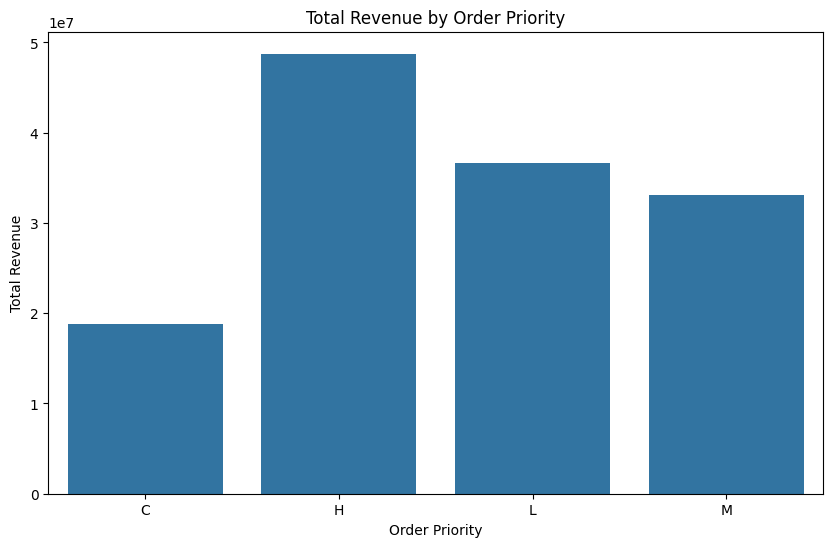

In [14]:
# Group by Order Priority and calculate total revenue, total cost, and total profit
priority_analysis = dataframe_Amazon_Sales_data.groupby('Order Priority')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

# Plotting Total Revenue by Order Priority
plt.figure(figsize=(10, 6))
sns.barplot(data=priority_analysis, x='Order Priority', y='Total Revenue')
plt.title('Total Revenue by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.show()


#### Monthly Sales Trend

In [15]:
# Extract month and year from Order Date
dataframe_Amazon_Sales_data['YearMonth'] = dataframe_Amazon_Sales_data['Order Date'].dt.to_period('M')

# Group by YearMonth and calculate total revenue
monthly_sales_trend = dataframe_Amazon_Sales_data.groupby('YearMonth')['Total Revenue'].sum().reset_index()

# Display the result
(monthly_sales_trend)


,YearMonth,Total Revenue
0,2010-02,3410661.12
1,2010-05,2587973.26
2,2010-06,1082418.40
3,2010-10,6064933.75
4,2010-11,3458252.00
5,2010-12,2581786.39
6,2011-01,1042225.35
7,2011-02,387002.20
8,2011-04,2798046.49
9,2011-05,272410.45


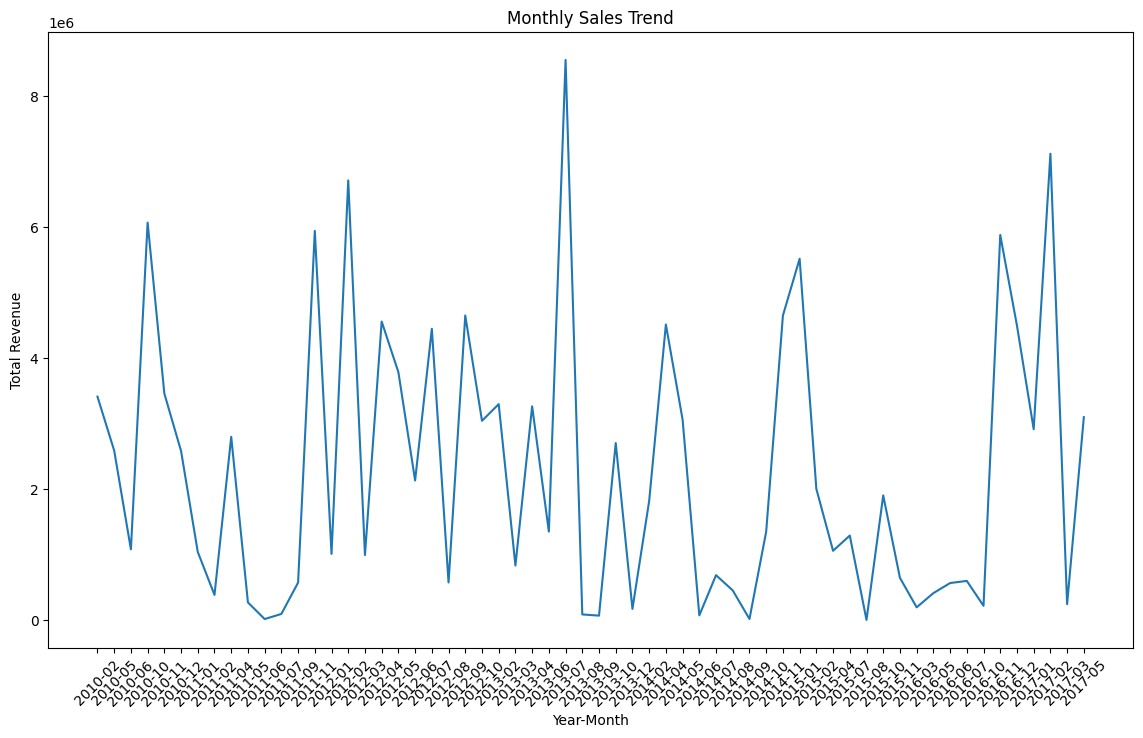

In [16]:
# Extract month and year from Order Date
dataframe_Amazon_Sales_data['YearMonth'] = dataframe_Amazon_Sales_data['Order Date'].dt.to_period('M').astype(str)

# Ensure 'Total Revenue' is numeric
dataframe_Amazon_Sales_data['Total Revenue'] = pd.to_numeric(dataframe_Amazon_Sales_data['Total Revenue'], errors='coerce')

# Group by YearMonth and calculate total revenue
monthly_sales_trend = dataframe_Amazon_Sales_data.groupby('YearMonth')['Total Revenue'].sum().reset_index()

# Plotting Monthly Sales Trend
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales_trend, x='YearMonth', y='Total Revenue')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

#### Box Plot of Total Profit by Item Type

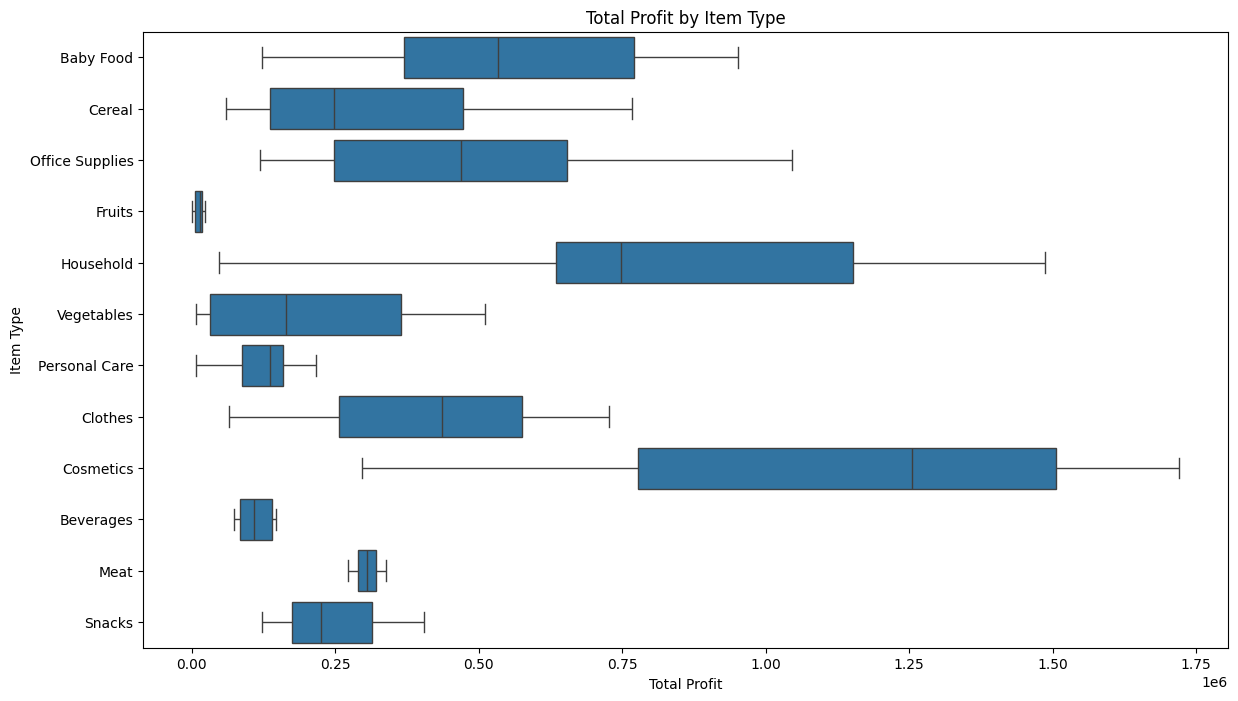

In [20]:
# Plotting box plot of Total Profit by Item Type
plt.figure(figsize=(14, 8))
sns.boxplot(data=dataframe_Amazon_Sales_data, x='Total Profit', y='Item Type')
plt.title('Total Profit by Item Type')
plt.xlabel('Total Profit')
plt.ylabel('Item Type')
plt.show()

#### Top 10 Products by Total Revenue

C:\Users\ziyap\AppData\Local\Temp\ipykernel_12688\3549695191.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Total Revenue', y=correct_product_column_name, palette='viridis')


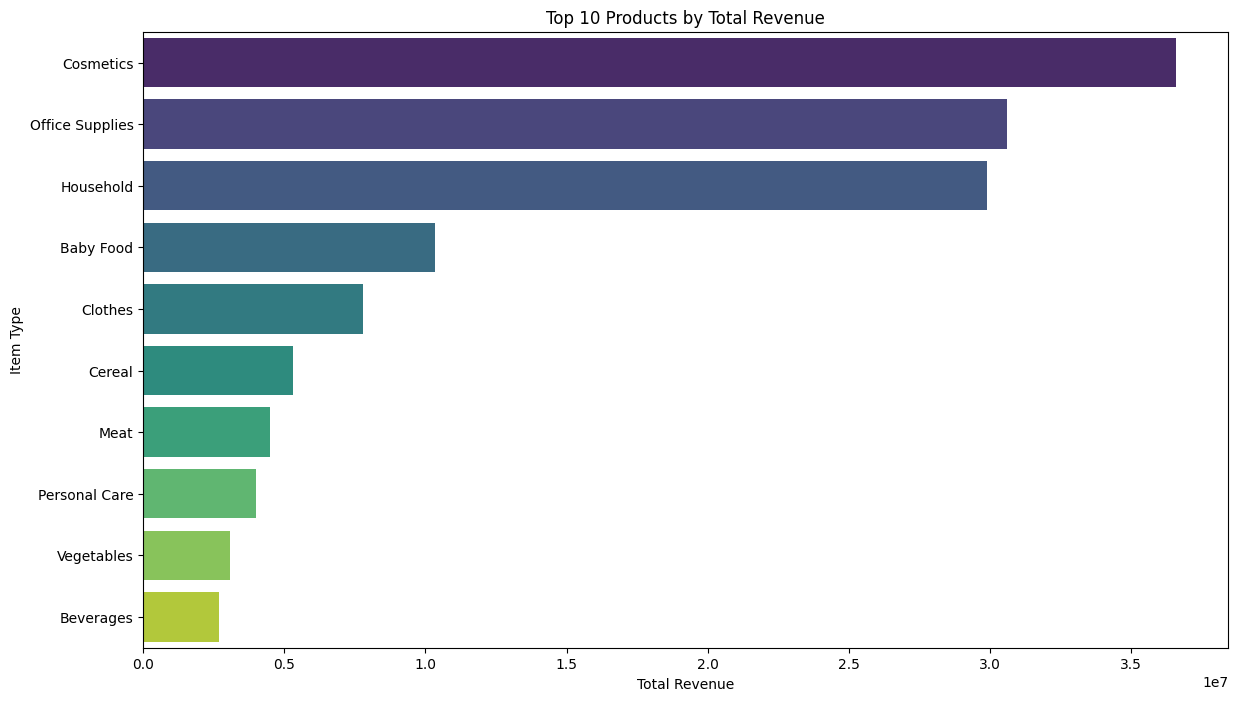

In [24]:
# Assuming the correct column name for product names is 'Product'
correct_product_column_name = 'Item Type' 

# Ensure 'Total Revenue' is numeric
dataframe_Amazon_Sales_data['Total Revenue'] = pd.to_numeric(dataframe_Amazon_Sales_data['Total Revenue'], errors='coerce')

# Top 10 Products by Total Revenue
top_products = dataframe_Amazon_Sales_data.groupby(correct_product_column_name)['Total Revenue'].sum().nlargest(10).reset_index()

# Plotting Top 10 Products by Total Revenue
plt.figure(figsize=(14, 8))
sns.barplot(data=top_products, x='Total Revenue', y=correct_product_column_name, palette='viridis')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel(correct_product_column_name)
plt.show()

#### Sales by Product Category

C:\Users\ziyap\AppData\Local\Temp\ipykernel_12688\2477480248.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_category, x='Total Revenue', y='Item Type', palette='plasma')


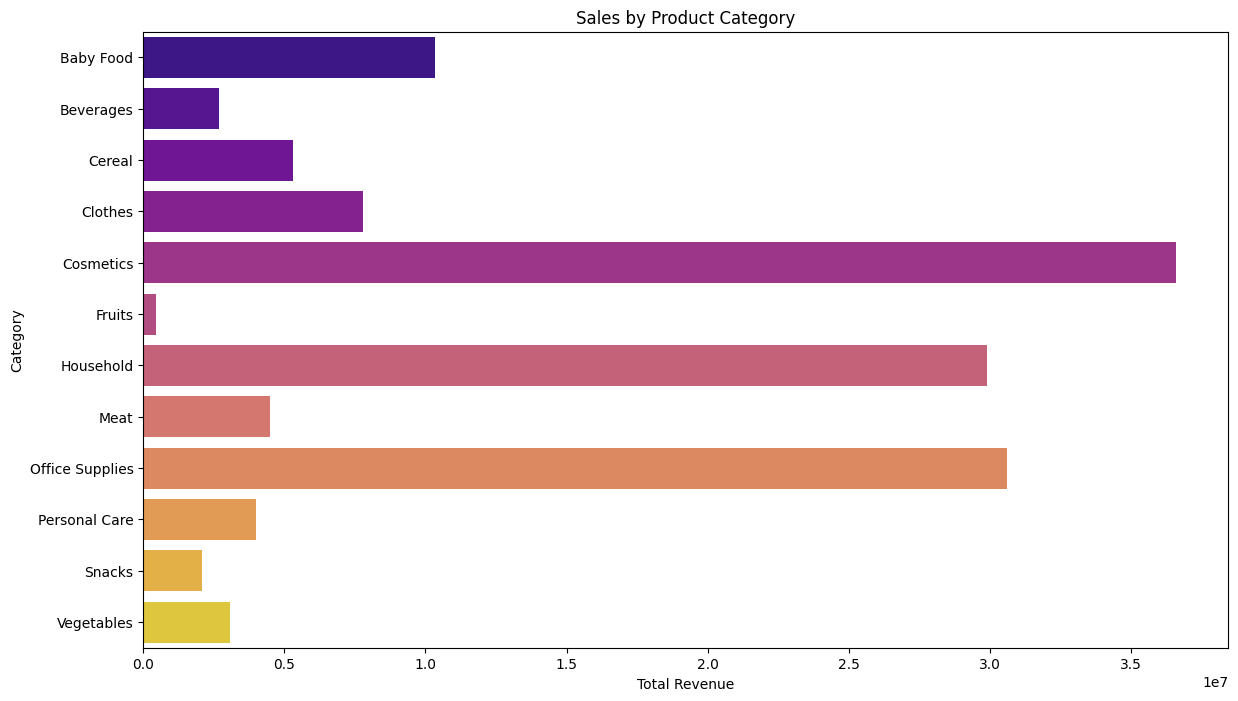

In [25]:
# Sales by Product Category
sales_by_category = dataframe_Amazon_Sales_data.groupby('Item Type')['Total Revenue'].sum().reset_index()

# Plotting Sales by Product Category
plt.figure(figsize=(14, 8))
sns.barplot(data=sales_by_category, x='Total Revenue', y='Item Type', palette='plasma')
plt.title('Sales by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Category')
plt.show()

#### Anomaly Detection with Visualizations

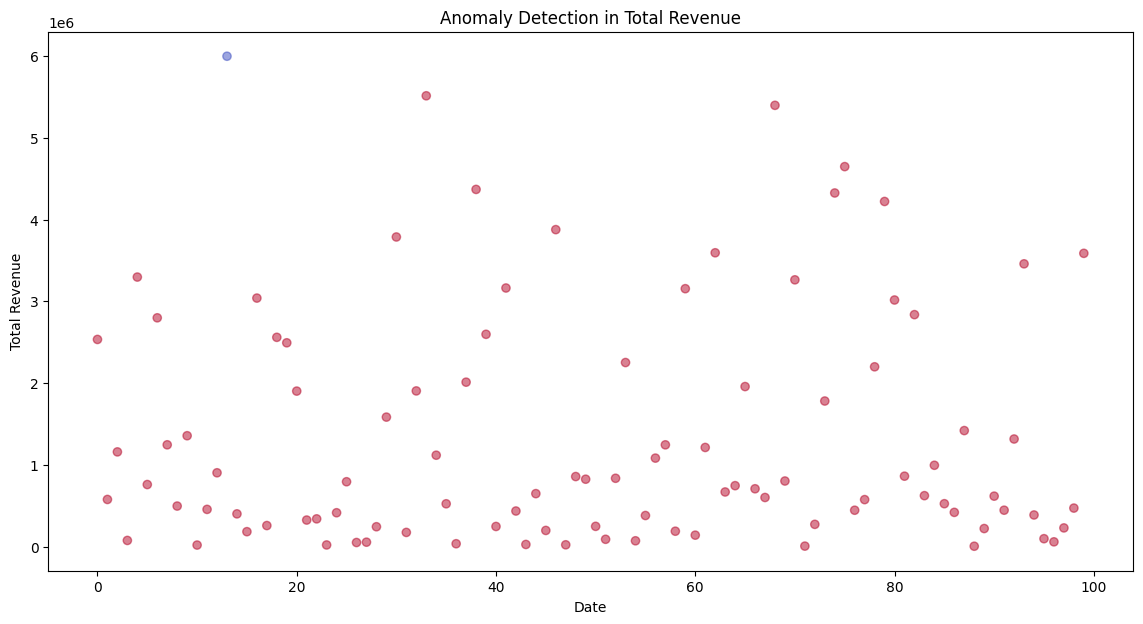

In [27]:
from sklearn.ensemble import IsolationForest

# Select relevant features for anomaly detection
anomaly_data = dataframe_Amazon_Sales_data[['Units Sold', 'Unit Price', 'Total Revenue']].dropna()

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
anomaly_data['Anomaly'] = iso_forest.fit_predict(anomaly_data)

# Plot the anomalies
plt.figure(figsize=(14, 7))
plt.scatter(anomaly_data.index, anomaly_data['Total Revenue'], c=anomaly_data['Anomaly'], cmap='coolwarm', alpha=0.5)
plt.title('Anomaly Detection in Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

#### Clustering Analysis with Visualizations

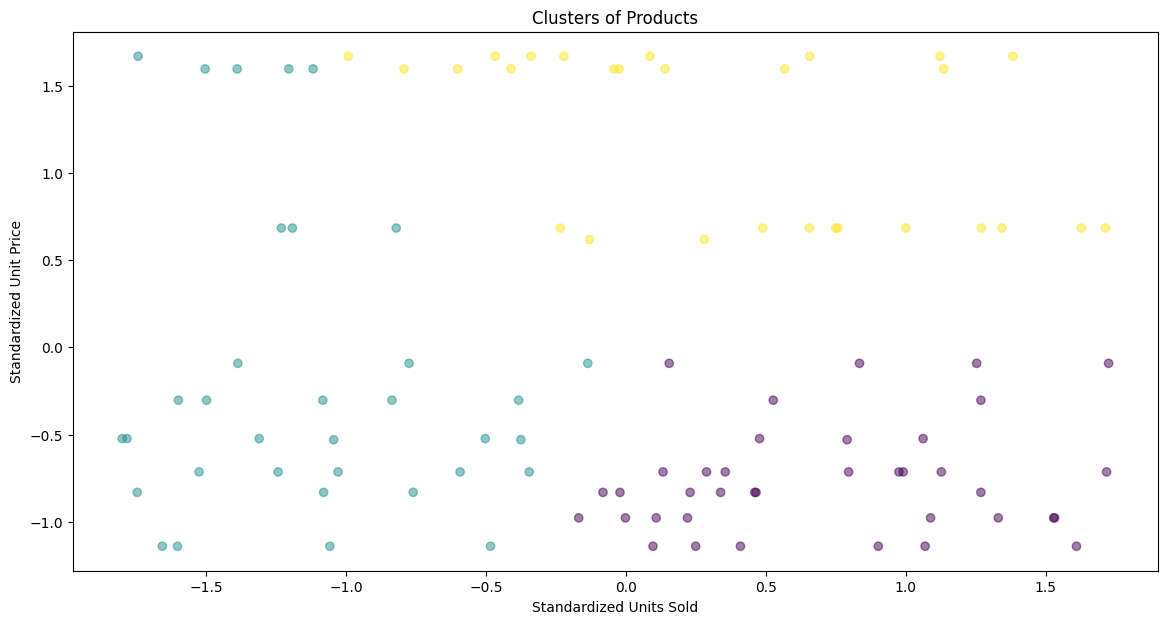

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
clustering_data = dataframe_Amazon_Sales_data[['Units Sold', 'Unit Price', 'Total Revenue']].dropna()

# Standardize the features
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Fit the K-means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_data_scaled)

# Add the cluster labels to the original dataframe
dataframe_Amazon_Sales_data.loc[clustering_data.index, 'Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(14, 7))
plt.scatter(clustering_data_scaled[:, 0], clustering_data_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('Clusters of Products')
plt.xlabel('Standardized Units Sold')
plt.ylabel('Standardized Unit Price')
plt.show()

#### Seasonal Decomposition of Time Series

C:\Users\ziyap\AppData\Local\Temp\ipykernel_12688\2759986711.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = dataframe_Amazon_Sales_data['Total Revenue'].resample('M').sum()


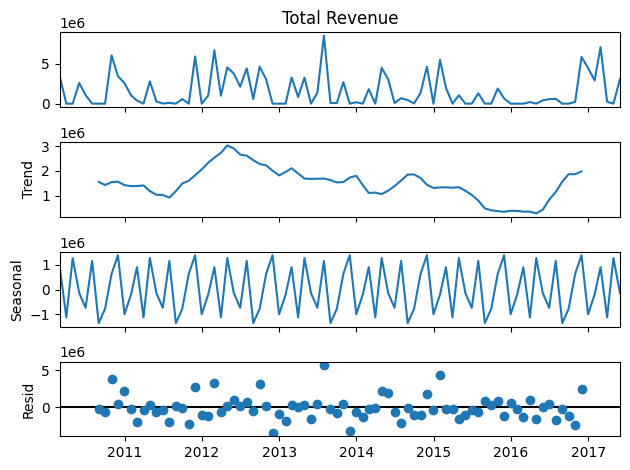

In [29]:
import statsmodels.api as sm

# Assuming 'Order Date' is the column with the dates
# Convert 'Order Date' to datetime
dataframe_Amazon_Sales_data['Order Date'] = pd.to_datetime(dataframe_Amazon_Sales_data['Order Date'])

# Set 'Order Date' as the index
dataframe_Amazon_Sales_data.set_index('Order Date', inplace=True)

# Resample the 'Total Revenue' by month and sum the values
monthly_revenue = dataframe_Amazon_Sales_data['Total Revenue'].resample('M').sum()

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(monthly_revenue, model='additive')
fig = decomposition.plot()
plt.show()